### tensorflowでAutoEncorder

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

### 単純に全結合層

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
latent_dim = 64 

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
          layers.Flatten(),
          layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(784, activation='sigmoid'),
          layers.Reshape((28, 28))
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [11]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [12]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0240 - val_loss: 0.0134
Epoch 2/10
60000/60000 [==============================] - 7s 108us/sample - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0095 - val_loss: 0.0093
Epoch 5/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
60000/60000 [==============================] - 22s 366us/sample - loss: 0.0091 - val_loss: 0.0091
Epoch 7/10
60000/60000 [==============================] - 13s 223us/sample - loss: 0.0090 - val_loss: 0.0091
Epoch 8/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0089 - val_loss: 0.0090
Epoch 9/10
60000/60000 [==============================] - 15s 250us/sample - loss: 0.

In [13]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

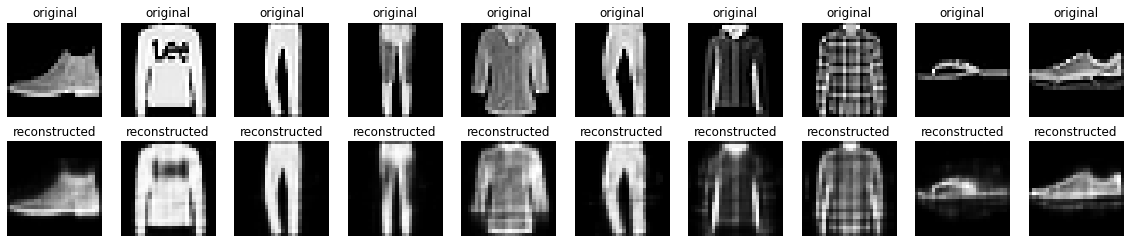

In [14]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.axis('off')

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.axis('off')
plt.show()

### ノイズを含んだ画像に対するAutoEncorder

In [15]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


### 異常検知としてのAutoEncorder